In [82]:

from __future__ import print_function
import csv
import tensorflow as tf
import numpy
import matplotlib.pyplot as plt
rng = numpy.random

def get_data(filename, col):
    with open(filename, 'r') as csvfile:
        csvFileReader = csv.reader(csvfile)
        next(csvFileReader)
        i = 1
        tempx = []
        tempy = []
        for row in csvFileReader:
            tempx.append(int(i))
            tempy.append(int(row[col]))            
            i = i + 1            
    return numpy.asarray(tempx), numpy.asarray(tempy)

In [83]:
# Parameters
learning_rate = 0.01
training_epochs = 6000
display_step = 2000

# Training Data
train_X, train_Y = get_data('LottoPredict642YTD.csv', 8)

print(train_Y)
n_samples = train_X.shape[0]

# tf Graph Input
X = tf.placeholder("float")
Y = tf.placeholder("float")

# Set model weights
W = tf.Variable(rng.randn(), name="weight")
b = tf.Variable(rng.randn(), name="bias")

# Construct a linear model
pred = tf.add(tf.multiply(X, W), b)

# Mean squared error
cost = tf.reduce_sum(tf.pow(pred-Y, 2))/(2*n_samples)
# Gradient descent
#  Note, minimize() knows to modify W and b because Variable objects are trainable=True by default
optimizer = tf.train.GradientDescentOptimizer(learning_rate).minimize(cost)

# Initialize the variables (i.e. assign their default value)
init = tf.global_variables_initializer()

[ 4  5 11  7  1  2  4  1  6  5  2  4  2  6  3  1  7  6  7  1  5  2 18  9 10
  7  8  4 14  3  2  2  8  5  4  4  1  7  3 11  2  9  3  4 11  4  3  4  2 12
  1  1]


Epoch: 2000 cost= 7.971044540 W= -0.0595779 b= 5.63598 PREDICT= 5.5764
Epoch: 4000 cost= 7.957364559 W= -0.0607581 b= 5.6961 PREDICT= 5.63534
Epoch: 6000 cost= 7.957185745 W= -0.0607743 b= 5.69692 PREDICT= 5.63615
Optimization Finished!
Training cost= 7.95719 W= -0.0607743 b= 5.69692 



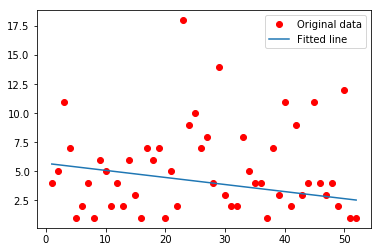

Testing... (Mean square loss Comparison)
Testing cost= 0.0
Absolute mean square loss difference: 7.95719


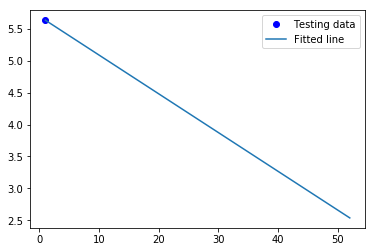

Prediction 5.63615


In [84]:
# Start training
with tf.Session() as sess:

    # Run the initializer
    sess.run(init)

    # Fit all training data
    for epoch in range(training_epochs):
        for (x, y) in zip(train_X, train_Y):
            sess.run(optimizer, feed_dict={X: x, Y: y})

        # Display logs per epoch step
        if (epoch+1) % display_step == 0:
            c = sess.run(cost, feed_dict={X: train_X, Y:train_Y})
            print("Epoch:", '%04d' % (epoch+1), "cost=", "{:.9f}".format(c), \
                "W=", sess.run(W), "b=", sess.run(b), "PREDICT=", (sess.run(W) + sess.run(b)))

    print("Optimization Finished!")
    training_cost = sess.run(cost, feed_dict={X: train_X, Y: train_Y})
    print("Training cost=", training_cost, "W=", sess.run(W), "b=", sess.run(b), '\n')

    # Graphic display
    plt.plot(train_X, train_Y, 'ro', label='Original data')
    plt.plot(train_X, sess.run(W) * train_X + sess.run(b), label='Fitted line')
    plt.legend()
    plt.show()
    
    prediction = (sess.run(W) + sess.run(b))

    # Testing example, as requested (Issue #2)
    test_X = numpy.asarray([1])
    test_Y = numpy.asarray([prediction])

    print("Testing... (Mean square loss Comparison)")
    testing_cost = sess.run(
        tf.reduce_sum(tf.pow(pred - Y, 2)) / (2 * test_X.shape[0]),
        feed_dict={X: test_X, Y: test_Y})  # same function as cost above
    print("Testing cost=", testing_cost)
    print("Absolute mean square loss difference:", abs(
        training_cost - testing_cost))

    plt.plot(test_X, test_Y, 'bo', label='Testing data')
    plt.plot(train_X, sess.run(W) * train_X + sess.run(b), label='Fitted line')
    plt.legend()
    plt.show()
    print("Prediction", prediction )